# **CH.SC.U4CSE23239 - Logistic Regression - Exercise 2**

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
import seaborn as sn

uploaded = files.upload();
data = pd.read_csv('medical.csv')

Saving medical.csv to medical (1).csv


In [ ]:
print(data.shape)
data.head()

(36, 4)


,Disease,Age,Gender,Smoker status
0,diseased,43,Male,Smoker
1,not diseased,18,Male,Smoker
2,diseased,22,Female,Non-smoker
3,diseased,25,Male,Non-smoker
4,not diseased,45,Female,Smoker


In [ ]:
gender_map = {'Male': 0, 'Female': 1}
smoker_map = {'Non-smoker': 0, 'Smoker': 1}
data['Gender'] = data['Gender'].map(gender_map)
data['Smoker status'] = data['Smoker status'].map(smoker_map)
data.head()

,Disease,Age,Gender,Smoker status
0,diseased,43,0,1
1,not diseased,18,0,1
2,diseased,22,1,0
3,diseased,25,0,0
4,not diseased,45,1,1


In [ ]:
data.isnull().sum()
feature_col = ['Age','Gender','Smoker status']
x = data[feature_col]
y = data.Disease
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=35)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(28, 3)

(28,)

(8, 3)

(8,)

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Confusion Matrix :  [[2 1]
 [4 1]]
Accuracy Score :  0.375
Accuracy in Percentage :  37 %


<Axes: xlabel='Predicted', ylabel='Actual'>

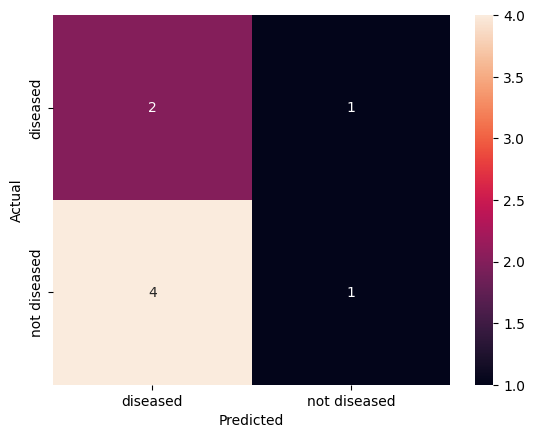

In [ ]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)